# 1. Import Required Packages

# Neural Networks with PyTorch

Here, we are going to train a Neural Networks on the Japanese MNIST dataset. It is composed of 70000 images of handwritten Hiragana characters. The target variables has 10 different classes.

Each image is of dimension 28 by 28. But we will flatten them to form a dataset composed of vectors of dimension (784, 1). The training process will be similar as for a structured dataset.

<img src='https://drive.google.com/uc?id=16TqEl9ESfXYbUpVafXD6h5UpJYGKfMxE' width="500" height="200">

Goal is to run at least 3 experiments and get a model that can achieve 80% accuracy with not much overfitting on this dataset.

Note:  Only using fully-connected and dropout layers here.

[1.1] We are going to use numpy, matplotlib and google.colab packages

In [1]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt

# 2. Download Dataset

We will store the dataset into your personal Google Drive.


[2.1] Mount Google Drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


[2.2] Create a folder called `DL_ASG_1` on your Google Drive at the root level

In [ ]:
! mkdir -p /content/gdrive/MyDrive/DL_ASG_1

[2.3] Navigate to this folder

In [3]:
%cd '/content/gdrive/MyDrive/DL_ASG_1'

/content/gdrive/MyDrive/DL_ASG_1


[2.4] Show the list of item on the folder

In [ ]:
!ls

best_model_exp_1.pth  best_model_exp_4.pth  best_model.pth	    kmnist-train-imgs.npz
best_model_exp_2.pth  best_model_exp_5.pth  kmnist-test-imgs.npz    kmnist-train-labels.npz
best_model_exp_3.pth  best_model_final.pth  kmnist-test-labels.npz


[2.4] Dowload the dataset files to your Google Drive if required

In [4]:
import requests
from tqdm import tqdm
import os.path

def download_file(url):
    path = url.split('/')[-1]
    if os.path.isfile(path):
        print (f"{path} already exists")
    else:
      r = requests.get(url, stream=True)
      with open(path, 'wb') as f:
          total_length = int(r.headers.get('content-length'))
          print('Downloading {} - {:.1f} MB'.format(path, (total_length / 1024000)))
          for chunk in tqdm(r.iter_content(chunk_size=1024), total=int(total_length / 1024) + 1, unit="KB"):
              if chunk:
                  f.write(chunk)

url_list = [
    'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz',
    'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz',
    'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-imgs.npz',
    'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-labels.npz'
]

for url in url_list:
    download_file(url)

kmnist-train-imgs.npz already exists
kmnist-train-labels.npz already exists
kmnist-test-imgs.npz already exists
kmnist-test-labels.npz already exists


[2.5] List the content of the folder and confirm files have been dowloaded properly

In [5]:
! ls

best_model_exp_1.pth  best_model_exp_4.pth  best_model_final.pth  kmnist-test-labels.npz
best_model_exp_2.pth  best_model_exp_5.pth  best_model.pth	  kmnist-train-imgs.npz
best_model_exp_3.pth  best_model_exp_6.pth  kmnist-test-imgs.npz  kmnist-train-labels.npz


# 3. Load Data

[3.1] Import the required modules from PyTorch

In [ ]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset

[3.2] **TODO** Create 2 variables called `img_height` and `img_width` that will both take the value 28

In [ ]:
img_height = 28
img_width = 28

[3.3] Create a function that loads a .npz file using numpy and return the content of the `arr_0` key

In [8]:
def load(f):
    return np.load(f)['arr_0']

[3.4] **TODO** Load the 4 files saved on your Google Drive into their respective variables: x_train, y_train, x_test and y_test

In [ ]:
# Loading all files
x_train = load('kmnist-train-imgs.npz')
x_test = load('kmnist-test-imgs.npz')
y_train = load('kmnist-train-labels.npz')
y_test = load('kmnist-test-labels.npz')

[3.5] **TODO** Using matplotlib display the first image from the train set and its target value

8


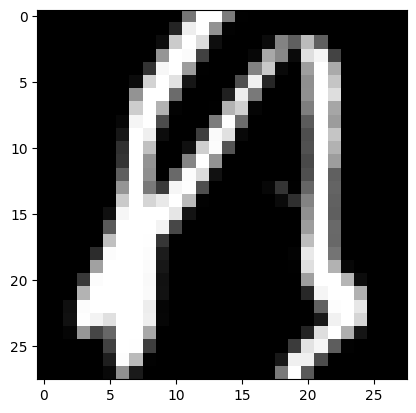

In [ ]:
plt.imshow(x_train[0], cmap='gray') # Gray scale for black and white
print(y_train[0])

# 4. Prepare Data

[4.1] **TODO** Reshape the images from the training and testing set to have the channel dimension last. The dimensions should be: (row_number, height, width, channel)

In [ ]:
# Reshaping images from training and testing set
x_train = x_train.reshape(x_train.shape[0], img_height, img_width, 1) # Channel 1 is gray scale
x_test = x_test.reshape(x_test.shape[0], img_height, img_width, 1)

[4.2] **TODO** Cast `x_train` and `x_test` into `float32` decimals

In [ ]:
# Casting into float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

[4.3] **TODO** Standardise the images of the training and testing sets. Originally each image contains pixels with value ranging from 0 to 255. after standardisation, the new value range should be from 0 to 1.

In [ ]:
x_train = x_train / 255.0 # Divide by float 255.0 for consistency
x_test = x_test / 255.0

[4.4] **TODO** Create a variable called `num_classes` that will take the value 10 which corresponds to the number of classes for the target variable

In [ ]:
num_classes = 10

[4.5] **TODO** Convert the target variable for the training and testing sets to a binary class matrix of dimension (rows, num_classes).

For example:
- class 0 will become [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
- class 1 will become [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
- class 5 will become [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
- class 9 will become [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [ ]:
y_train = np.eye(num_classes)[y_train] # Indexing based on y_train
y_test = np.eye(num_classes)[y_test] # Indexing based on y_test

# Check y values of training and testing sets
print(y_train)
print("-"*30)
print(y_test)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
------------------------------
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


# **Experiment 0: Simple Neural Network Model**

# 5. Define Neural Networks Architecure

[5.1] Set the seed in PyTorch for reproducing results



In [ ]:
torch.manual_seed(42)

[5.2] **TODO** Define the architecture of your Neural Networks and save it into a variable called `model`

In [ ]:
model = nn.Sequential(
    nn.Flatten(),         # Flatten to convert into a 1D tensor for appropriate input
    nn.Linear(784, 128),  # 784 input features to 128 neurons
    nn.ReLU(),            # Activation function
    nn.Linear(128, 10)    # Output layer 128 neurons to 10 classes
)

[5.2] **TODO** Print the summary of your model

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=10, bias=True)
)


# 6. Train Neural Networks

[6.1] **TODO** Create 2 variables called `batch_size` and `epochs` that will  respectively take the values 128 and 500

In [ ]:
batch_size = 128
epochs = 500

In [21]:
# Convert to tensors to prepare DataLoader
x_train_tensor = torch.tensor(x_train, dtype=torch.float32) # float32 since input expects float inputs
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

# Convert y_train and y_test tensors back to class labels for CrossEntropyLoss
y_train_tensor = torch.tensor(np.argmax(y_train, axis=1), dtype=torch.long) # Converting y_train and y_test to class labels and dtype long because of cross entropy
y_test_tensor = torch.tensor(np.argmax(y_test, axis=1), dtype=torch.long)

In [22]:
# Setting up dataloader for train and test
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

dataloader_train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dataloader_test = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

[6.2] **TODO** Compile your model with the appropriate loss function, the optimiser of your choice and the accuracy metric

In [ ]:
criterion = nn.CrossEntropyLoss() # Cross entropy is used for multi-class classification
optimizer = optim.Adam(model.parameters()) # Adam generally performs well across different types of neural networks

[6.3] **TODO** Train your model
using the number of epochs defined. Calculate the total loss and save it to a variable called total_loss.

In [ ]:
model.train()  # Set model to training mode
epoch_losses = []

for epoch in range(epochs):
    total_loss = 0.0
    correct = 0
    total = 0

    for data, target in dataloader_train:
        data, target = data.to(device), target.to(device)  # Move to GPU if available

        optimizer.zero_grad()  # Reset gradients
        output = model(data)  # Forward pass
        loss = criterion(output, target)  # Compute loss

        loss.backward()  # Backpropagation
        optimizer.step()  # Update model weights

        total_loss += loss.item()  # Accumulate total loss

        # Compute accuracy
        _, predicted = torch.max(output, 1)  # Get predicted class index
        correct += (predicted == target).sum().item()  # Count correct predictions
        total += target.size(0)  # Total number of samples

    # Compute average loss and accuracy
    avg_loss = total_loss / len(dataloader_train)
    epoch_losses.append(avg_loss)
    accuracy = 100 * correct / total  # Training accuracy

    # Print training loss and accuracy
    print(f"EPOCH: {epoch+1}/{epochs}, Loss: {avg_loss:.6f}, Accuracy: {accuracy:.2f}%")

EPOCH: 1/500, Loss: 0.591795, Accuracy: 82.98%
EPOCH: 2/500, Loss: 0.308888, Accuracy: 90.98%
EPOCH: 3/500, Loss: 0.229311, Accuracy: 93.36%
EPOCH: 4/500, Loss: 0.182956, Accuracy: 94.80%
EPOCH: 5/500, Loss: 0.150214, Accuracy: 95.75%
EPOCH: 6/500, Loss: 0.125124, Accuracy: 96.57%
EPOCH: 7/500, Loss: 0.106285, Accuracy: 97.06%
EPOCH: 8/500, Loss: 0.089626, Accuracy: 97.61%
EPOCH: 9/500, Loss: 0.075898, Accuracy: 97.97%
EPOCH: 10/500, Loss: 0.064076, Accuracy: 98.31%
EPOCH: 11/500, Loss: 0.055009, Accuracy: 98.60%
EPOCH: 12/500, Loss: 0.045747, Accuracy: 98.90%
EPOCH: 13/500, Loss: 0.037798, Accuracy: 99.12%
EPOCH: 14/500, Loss: 0.033614, Accuracy: 99.23%
EPOCH: 15/500, Loss: 0.026889, Accuracy: 99.48%
EPOCH: 16/500, Loss: 0.023161, Accuracy: 99.55%
EPOCH: 17/500, Loss: 0.019686, Accuracy: 99.62%
EPOCH: 18/500, Loss: 0.017519, Accuracy: 99.69%
EPOCH: 19/500, Loss: 0.013373, Accuracy: 99.80%
EPOCH: 20/500, Loss: 0.010870, Accuracy: 99.86%
EPOCH: 21/500, Loss: 0.010498, Accuracy: 99.86%
E

[6.4] **TODO** Test your model.  Initiate the model.eval() along with torch.no_grad() to turn off the gradients.


In [ ]:
# Set model to evaluation
model.eval()

input_size = 28*28
correct = 0
total = 0

# Get the predictions for the test dataset
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data, target in dataloader_test:
        data, target = data.to(device), target.to(device) # Move data to GPU/CPU
        data = data.view(-1, input_size) # Flatten input data if necessary
        outputs = model(data) # Forward pass - get model predictions
        _, predicted = torch.max(outputs.data, 1) # Obtain predicted class

        total += target.size(0) # Update total count of test samples
        correct += (predicted == target).sum().item() # Count correct predictions

        predicted_labels.extend(predicted.tolist()) # Store predicted labels
        true_labels.extend(target.tolist()) # Store true labels


# 7. Analyse Results

[7.1] **TODO** Display the performance of your model on the training and testing sets

In [ ]:
# Printing out the accuracy of the model on the test set (training accuracy is calculated per epoch previously)
accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.4f}%")

Test Accuracy: 89.3000%


[7.2] **TODO** Plot the learning curve of your model

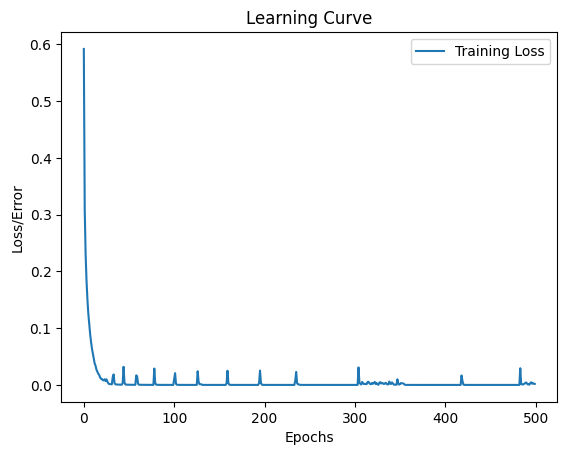

In [ ]:
plt.plot(range(epochs), epoch_losses, label='Training Loss')
plt.legend()
plt.ylabel("Loss/Error")
plt.xlabel("Epochs")
plt.title("Learning Curve")
plt.show()

[7.3] **TODO** Display the confusion matrix on the testing set predictions

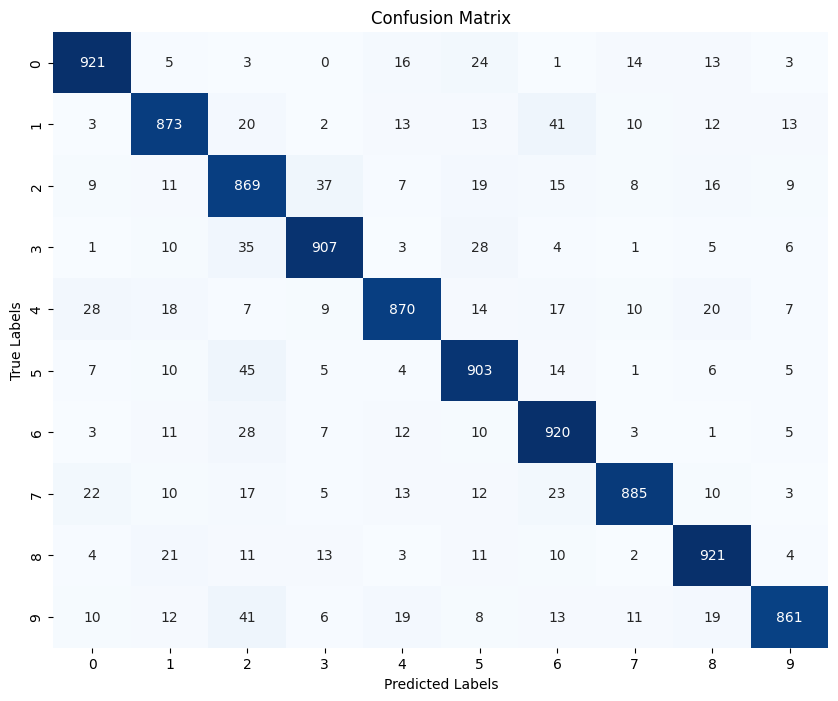

In [ ]:
# Import relevant libraries for confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

**Conclusion:** Training accuracy reached 100% for the majority of epochs as training progressed, while the final accuracy was 89.27% suggesting overfitting. To address this issue, the training set will be split to include a validation set in the next experiment. Overfitting will be assessed using training and validation loss curves and by comparing accuracies.

# 8. Experiment 1: Evaluating Overfitting by Introducing a Validation Set

The experiment 0 model seems to be overfitting to the training data due to the high accuracy and substantially lower accuracy in the testing set. Therefore, to confirm whether there is overfitting, an additional validation set from the training will be split.

From the learning curve, the loss plateaus around 50, so there is no need for 500 epochs. For quicker experimentation, epochs will be set around 50. If the loss is still decreasing, the epoch count can be increased again.

In [ ]:
# Same model as experiment 0
model_exp_1 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

criterion = nn.CrossEntropyLoss() # Cross Entropy Loss
optimizer = optim.Adam(model_exp_1.parameters()) # Adam Optimiser

## [8.1] Setting up the validation set and dataloader, including batch size and epoch settings

In [79]:
from sklearn.model_selection import train_test_split

# Further split training data into training and validation
x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Convert to tensors
x_train_tensor = torch.tensor(x_train_split, dtype=torch.float32)
y_train_tensor = torch.tensor(np.argmax(y_train_split, axis=1), dtype=torch.long)
x_val_tensor = torch.tensor(x_val, dtype=torch.float32)
y_val_tensor = torch.tensor(np.argmax(y_val, axis=1), dtype=torch.long)

# Batch size and epochs
batch_size = 128
epochs = 50

# Create Dataloaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
dataloader_train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dataloader_val = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

## [8.2] Training and Validation Loop with Loss and Accuracy Tracking

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_exp_1.to(device)

# Lists to store loss and accuracy values
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    model_exp_1.train()  # Set the model to training mode
    total_train_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training loop
    for data, target in dataloader_train:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model_exp_1(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

        # Compute training accuracy
        _, predicted = torch.max(output, 1)
        correct_train += (predicted == target).sum().item()
        total_train += target.size(0)

    avg_train_loss = total_train_loss / len(dataloader_train)
    train_accuracy = (correct_train / total_train) * 100

    # Compute validation loss and accuracy
    model_exp_1.eval()  # Set the model to evaluation mode
    total_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():  # Disable gradient computation for validation
        for data, target in dataloader_val:
            data, target = data.to(device), target.to(device)
            output = model_exp_1(data)
            loss = criterion(output, target)
            total_val_loss += loss.item()

            # Compute validation accuracy
            _, predicted = torch.max(output, 1)
            correct_val += (predicted == target).sum().item()
            total_val += target.size(0)

    avg_val_loss = total_val_loss / len(dataloader_val)
    val_accuracy = (correct_val / total_val) * 100  # Convert to percentage

    # Store losses and accuracies for plotting
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.6f}, Train Acc: {train_accuracy:.2f}%, Validation Loss: {avg_val_loss:.6f}, Validation Acc: {val_accuracy:.2f}%")


Epoch 1/50, Train Loss: 0.643743, Train Acc: 81.70%, Validation Loss: 0.405283, Validation Acc: 88.25%
Epoch 2/50, Train Loss: 0.342296, Train Acc: 90.04%, Validation Loss: 0.310993, Validation Acc: 90.84%
Epoch 3/50, Train Loss: 0.256972, Train Acc: 92.55%, Validation Loss: 0.254034, Validation Acc: 92.42%
Epoch 4/50, Train Loss: 0.203341, Train Acc: 94.18%, Validation Loss: 0.225188, Validation Acc: 93.33%
Epoch 5/50, Train Loss: 0.167167, Train Acc: 95.28%, Validation Loss: 0.210579, Validation Acc: 93.92%
Epoch 6/50, Train Loss: 0.139047, Train Acc: 96.17%, Validation Loss: 0.196443, Validation Acc: 94.27%
Epoch 7/50, Train Loss: 0.118493, Train Acc: 96.74%, Validation Loss: 0.187662, Validation Acc: 94.62%
Epoch 8/50, Train Loss: 0.099746, Train Acc: 97.32%, Validation Loss: 0.184999, Validation Acc: 94.78%
Epoch 9/50, Train Loss: 0.085164, Train Acc: 97.77%, Validation Loss: 0.178545, Validation Acc: 94.83%
Epoch 10/50, Train Loss: 0.072279, Train Acc: 98.16%, Validation Loss: 0.

## [8.3] Training and Validation Loss Curve

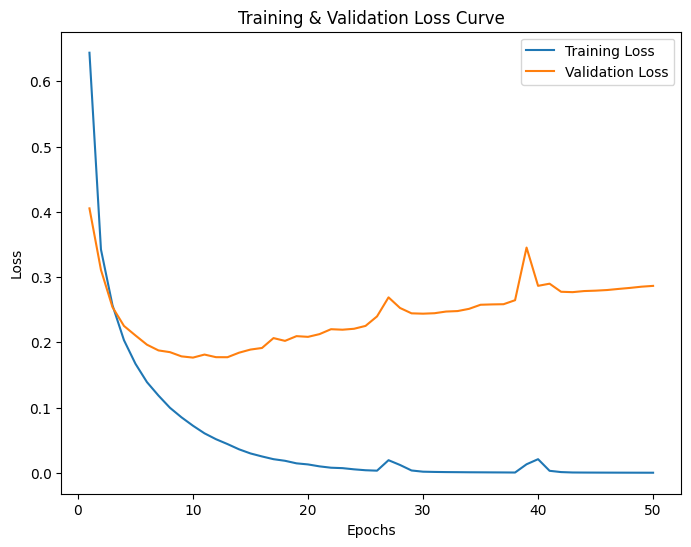

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Curve')
plt.legend()
plt.show()


Here, it can be observed that the model is overfitting as indicated by the validation loss curve increasing after a point (~ 10 epochs), while the training loss continues to sharply decrease. This suggests the need for model tuning to minimize overfitting

# 9. Experiment 2: Dropout Method and Early Stopping

Due to the observed overfitting, dropout will be used to help reduce the issue. Early stopping will also be implemented to prevent the model from overfitting by stopping training once the validation loss stops improving. This ensures that the model does not continue learning noise in the training data and becomes more generalised.

Here, dropout values of 0.5 and 0.3 will be tested and decide which value is more optimal.

## [9.1] Dropout = 0.5

Model Setup

In [ ]:
model_exp_2 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Dropout(0.5), # Dropout value of 0.5
    nn.Linear(128, 10)
)

criterion = nn.CrossEntropyLoss() # Cross Entropy Loss
optimizer = optim.Adam(model_exp_2.parameters()) # Adam optimiser

Training and validation loop

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_exp_2.to(device)

# Lists to store loss and accuracy values
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Early stopping parameters
patience = 10  # Number of epochs to wait for improvement
best_val_loss = float('inf')  # Initialise with a very high loss
epochs_no_improve = 0  # Counter for epochs without improvement
best_model_path = 'best_model_exp_2.pth'  # Path to save the best model
exp_2_epochs = 0 # Number of total epochs

for epoch in range(epochs):
    model_exp_2.train()  # Set the model to training mode
    total_train_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training loop
    for data, target in dataloader_train:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model_exp_2(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

        # Compute training accuracy
        _, predicted = torch.max(output, 1)
        correct_train += (predicted == target).sum().item()
        total_train += target.size(0)

    avg_train_loss = total_train_loss / len(dataloader_train)
    train_accuracy = (correct_train / total_train) * 100

    # Compute validation loss and accuracy
    model_exp_2.eval()  # Set the model to evaluation mode
    total_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():  # Disable gradient computation for validation
        for data, target in dataloader_val:
            data, target = data.to(device), target.to(device)
            output = model_exp_2(data)
            loss = criterion(output, target)
            total_val_loss += loss.item()

            # Compute validation accuracy
            _, predicted = torch.max(output, 1)
            correct_val += (predicted == target).sum().item()
            total_val += target.size(0)

    avg_val_loss = total_val_loss / len(dataloader_val)
    val_accuracy = (correct_val / total_val) * 100

    # Store losses and accuracies for plotting
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print progress
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.6f}, Train Acc: {train_accuracy:.2f}%, Validation Loss: {avg_val_loss:.6f}, Validation Acc: {val_accuracy:.2f}%")

    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_without_improvement = 0
        # Save the model with the best validation loss
        torch.save(model_exp_2.state_dict(), 'best_model_exp_2.pth')
        exp_2_epochs = epoch+1
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Early stopping after {epoch+1} epochs due to no improvement in validation loss.")
            exp_2_epochs = epoch+1
            break


Epoch 1/50, Train Loss: 0.816488, Train Acc: 75.76%, Validation Loss: 0.446634, Validation Acc: 87.02%
Epoch 2/50, Train Loss: 0.499583, Train Acc: 84.95%, Validation Loss: 0.342189, Validation Acc: 89.91%
Epoch 3/50, Train Loss: 0.419609, Train Acc: 87.41%, Validation Loss: 0.296713, Validation Acc: 91.15%
Epoch 4/50, Train Loss: 0.378328, Train Acc: 88.64%, Validation Loss: 0.267470, Validation Acc: 92.09%
Epoch 5/50, Train Loss: 0.350638, Train Acc: 89.32%, Validation Loss: 0.250638, Validation Acc: 92.71%
Epoch 6/50, Train Loss: 0.328834, Train Acc: 89.96%, Validation Loss: 0.237905, Validation Acc: 92.91%
Epoch 7/50, Train Loss: 0.310386, Train Acc: 90.40%, Validation Loss: 0.226737, Validation Acc: 93.42%
Epoch 8/50, Train Loss: 0.297847, Train Acc: 90.98%, Validation Loss: 0.218504, Validation Acc: 93.53%
Epoch 9/50, Train Loss: 0.287847, Train Acc: 91.08%, Validation Loss: 0.211338, Validation Acc: 93.81%
Epoch 10/50, Train Loss: 0.274361, Train Acc: 91.42%, Validation Loss: 0.

Training and Validation Loss curve for Dropout = 0.5

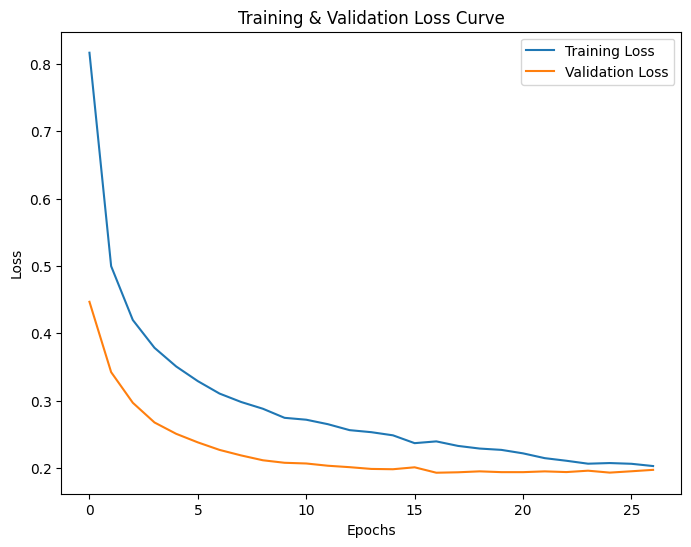

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(range(0, exp_2_epochs), train_losses, label='Training Loss')
plt.plot(range(0, exp_2_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Curve')
plt.legend()
plt.show()

## [9.2] Dropout = 0.3

Model Setup

In [ ]:
model_exp_2 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Dropout(0.3), # Reduced to 0.3
    nn.Linear(128, 10)
)

criterion = nn.CrossEntropyLoss() # Cross Entropy Loss
optimizer = optim.Adam(model_exp_2.parameters()) # Adam Optimiser

Training and validation loop

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_exp_2.to(device)

# Lists to store loss and accuracy values
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Early stopping parameters
patience = 10  # Number of epochs to wait for improvement
best_val_loss = float('inf')  # Initialise with a very high loss
epochs_no_improve = 0  # Counter for epochs without improvement
best_model_path = 'best_model_exp_2.pth'  # Path to save the best model
exp_2_epochs = 0 # Number of total epochs

for epoch in range(epochs):
    model_exp_2.train()  # Set the model to training mode
    total_train_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training loop
    for data, target in dataloader_train:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model_exp_2(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

        # Compute training accuracy
        _, predicted = torch.max(output, 1)
        correct_train += (predicted == target).sum().item()
        total_train += target.size(0)

    avg_train_loss = total_train_loss / len(dataloader_train)
    train_accuracy = (correct_train / total_train) * 100

    # Compute validation loss and accuracy
    model_exp_2.eval()  # Set the model to evaluation mode
    total_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():  # Disable gradient computation for validation
        for data, target in dataloader_val:
            data, target = data.to(device), target.to(device)
            output = model_exp_2(data)
            loss = criterion(output, target)
            total_val_loss += loss.item()

            # Compute validation accuracy
            _, predicted = torch.max(output, 1)
            correct_val += (predicted == target).sum().item()
            total_val += target.size(0)

    avg_val_loss = total_val_loss / len(dataloader_val)
    val_accuracy = (correct_val / total_val) * 100

    # Store losses and accuracies for plotting
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print progress
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.6f}, Train Acc: {train_accuracy:.2f}%, Validation Loss: {avg_val_loss:.6f}, Validation Acc: {val_accuracy:.2f}%")

    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_without_improvement = 0
        # Save the model with the best validation loss
        torch.save(model_exp_2.state_dict(), 'best_model_exp_2.pth')
        exp_2_epochs = epoch+1
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Early stopping after {epoch+1} epochs due to no improvement in validation loss.")
            exp_2_epochs = epoch+1
            break


Epoch 1/50, Train Loss: 0.710184, Train Acc: 79.12%, Validation Loss: 0.414395, Validation Acc: 87.65%
Epoch 2/50, Train Loss: 0.404629, Train Acc: 87.92%, Validation Loss: 0.311322, Validation Acc: 90.89%
Epoch 3/50, Train Loss: 0.328076, Train Acc: 90.34%, Validation Loss: 0.263439, Validation Acc: 92.28%
Epoch 4/50, Train Loss: 0.280183, Train Acc: 91.69%, Validation Loss: 0.232006, Validation Acc: 92.97%
Epoch 5/50, Train Loss: 0.252498, Train Acc: 92.42%, Validation Loss: 0.219805, Validation Acc: 93.56%
Epoch 6/50, Train Loss: 0.226981, Train Acc: 93.06%, Validation Loss: 0.204116, Validation Acc: 93.86%
Epoch 7/50, Train Loss: 0.208656, Train Acc: 93.75%, Validation Loss: 0.194663, Validation Acc: 94.19%
Epoch 8/50, Train Loss: 0.195093, Train Acc: 94.09%, Validation Loss: 0.188858, Validation Acc: 94.31%
Epoch 9/50, Train Loss: 0.179224, Train Acc: 94.54%, Validation Loss: 0.184942, Validation Acc: 94.67%
Epoch 10/50, Train Loss: 0.171133, Train Acc: 94.79%, Validation Loss: 0.

Training and validation loss curve for Dropout = 0.3

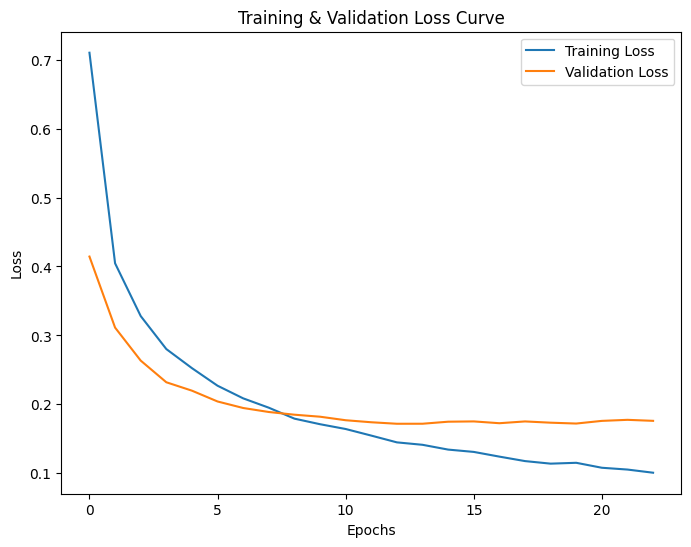

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(range(0, exp_2_epochs), train_losses, label='Training Loss')
plt.plot(range(0, exp_2_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Curve')
plt.legend()
plt.show()

**Conclusion:** When using a dropout of 0.5, the model struggles to learn patterns, as indicated by the high loss values in both training and validation, suggesting that the dropout rate may be too high. Therefore, a dropout of 0.3 appears more optimal, resulting in lower training loss and overall higher training and validation accuracies, with only small differences between them. However, the validation loss remains relatively high compared to the training loss as the epochs progress. To further improve the model, increasing its complexity will be explored to enhance performance.

# 10. Experiment 3: Increasing Model Complexity

To achieve better training and validation loss, increasing model complexity will be explored to see if a more complex model can better capture relationships.

Model Setup

In [ ]:
model_exp_3 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),  # Increased hidden size to 256
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 128),  # Added an extra hidden layer
    nn.ReLU(),
    nn.Linear(128, 10)  # Output layer
)

criterion = nn.CrossEntropyLoss() # Cross Entropy Loss
optimizer = optim.Adam(model_exp_3.parameters()) # Adam Optimiser

Training and validation loop

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_exp_3.to(device)

# Lists to store loss and accuracy values
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Early stopping parameters
patience = 10  # Number of epochs to wait for improvement
best_val_loss = float('inf')  # Initialise with a very high loss
epochs_no_improve = 0  # Counter for epochs without improvement
best_model_path = 'best_model_exp_3.pth'  # Path to save the best model
exp_3_epochs = 0 # Number of total epochs

for epoch in range(epochs):
    model_exp_3.train()  # Set the model to training mode
    total_train_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training loop
    for data, target in dataloader_train:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model_exp_3(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

        # Compute training accuracy
        _, predicted = torch.max(output, 1)
        correct_train += (predicted == target).sum().item()
        total_train += target.size(0)

    avg_train_loss = total_train_loss / len(dataloader_train)
    train_accuracy = (correct_train / total_train) * 100

    # Compute validation loss and accuracy
    model_exp_3.eval()  # Set the model to evaluation mode
    total_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():  # Disable gradient computation for validation
        for data, target in dataloader_val:
            data, target = data.to(device), target.to(device)
            output = model_exp_3(data)
            loss = criterion(output, target)
            total_val_loss += loss.item()

            # Compute validation accuracy
            _, predicted = torch.max(output, 1)
            correct_val += (predicted == target).sum().item()
            total_val += target.size(0)

    avg_val_loss = total_val_loss / len(dataloader_val)
    val_accuracy = (correct_val / total_val) * 100

    # Store losses and accuracies for plotting
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print progress
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.6f}, Train Acc: {train_accuracy:.2f}%, Validation Loss: {avg_val_loss:.6f}, Validation Acc: {val_accuracy:.2f}%")

    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_without_improvement = 0
        # Save the model with the best validation loss
        torch.save(model_exp_3.state_dict(), 'best_model_exp_3.pth')
        exp_3_epochs = epoch+1
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Early stopping after {epoch+1} epochs due to no improvement in validation loss.")
            exp_3_epochs = epoch+1
            break


Epoch 1/50, Train Loss: 0.614284, Train Acc: 81.74%, Validation Loss: 0.326635, Validation Acc: 89.95%
Epoch 2/50, Train Loss: 0.300584, Train Acc: 90.88%, Validation Loss: 0.229923, Validation Acc: 93.07%
Epoch 3/50, Train Loss: 0.221876, Train Acc: 93.27%, Validation Loss: 0.191273, Validation Acc: 94.09%
Epoch 4/50, Train Loss: 0.177102, Train Acc: 94.60%, Validation Loss: 0.172264, Validation Acc: 94.87%
Epoch 5/50, Train Loss: 0.148815, Train Acc: 95.46%, Validation Loss: 0.161928, Validation Acc: 95.13%
Epoch 6/50, Train Loss: 0.127244, Train Acc: 95.94%, Validation Loss: 0.156056, Validation Acc: 95.36%
Epoch 7/50, Train Loss: 0.110280, Train Acc: 96.59%, Validation Loss: 0.152348, Validation Acc: 95.41%
Epoch 8/50, Train Loss: 0.097558, Train Acc: 96.90%, Validation Loss: 0.148878, Validation Acc: 95.69%
Epoch 9/50, Train Loss: 0.087448, Train Acc: 97.22%, Validation Loss: 0.148533, Validation Acc: 95.81%
Epoch 10/50, Train Loss: 0.078220, Train Acc: 97.41%, Validation Loss: 0.

Training and Validation loss curve for new model

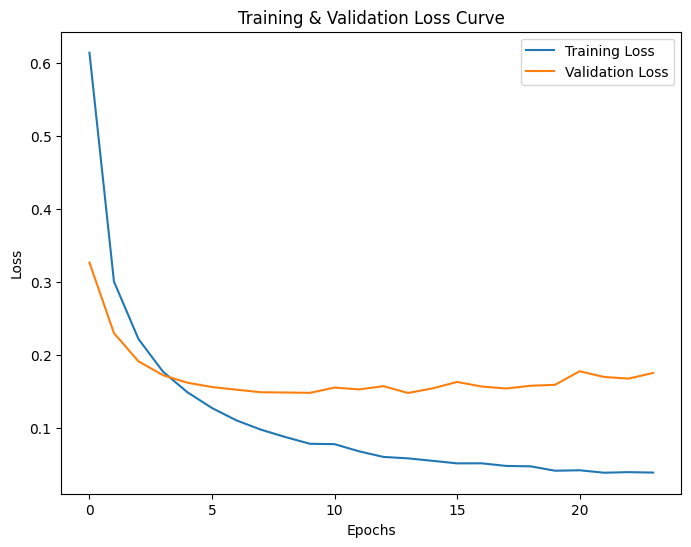

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(range(0, exp_3_epochs), train_losses, label='Training Loss')
plt.plot(range(0, exp_3_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Curve')
plt.legend()
plt.show()

**Conclusion:** The new model, which is more complex than the previous one, achieved the highest validation accuracy so far. However, it seems to be overfitting again, as seen in the loss curve as well as the accuracy differences between training and validation set. Therefore, regularisation will be incorporated to address this issue.

# 11. Experiment 4: L2 Regularisation

Despite having dropout, the new, more complex model seems to be overfitting. To address this, L2 regularisation will be added by testing different weight decay values (1e-4, 5e-4, and 1e-3) to reduce overfitting and improve generalisation.

## [11.1] Weight Decay = 1e-4

Model Setup

In [91]:
model_exp_4 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

criterion = nn.CrossEntropyLoss() # Cross Entropy Loss
optimizer = optim.Adam(model_exp_4.parameters(), weight_decay=1e-4)  # Added L2 penalty

epochs = 200 # Increased epoch for more time to converge


Training and Validation loop

In [92]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_exp_4.to(device)

# Lists to store loss and accuracy values
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Early stopping parameters
patience = 10  # Number of epochs to wait for improvement
best_val_loss = float('inf')  # Initialise with a very high loss
epochs_no_improve = 0  # Counter for epochs without improvement
best_model_path = 'best_model_exp_4.pth'  # Path to save the best model
exp_4_epochs = 0 # Number of total epochs

for epoch in range(epochs):
    model_exp_4.train()  # Set the model to training mode
    total_train_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training loop
    for data, target in dataloader_train:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model_exp_4(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

        # Compute training accuracy
        _, predicted = torch.max(output, 1)
        correct_train += (predicted == target).sum().item()
        total_train += target.size(0)

    avg_train_loss = total_train_loss / len(dataloader_train)
    train_accuracy = (correct_train / total_train) * 100

    # Compute validation loss and accuracy
    model_exp_4.eval()  # Set the model to evaluation mode
    total_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():  # Disable gradient computation for validation
        for data, target in dataloader_val:
            data, target = data.to(device), target.to(device)
            output = model_exp_4(data)
            loss = criterion(output, target)
            total_val_loss += loss.item()

            # Compute validation accuracy
            _, predicted = torch.max(output, 1)
            correct_val += (predicted == target).sum().item()
            total_val += target.size(0)

    avg_val_loss = total_val_loss / len(dataloader_val)
    val_accuracy = (correct_val / total_val) * 100

    # Store losses and accuracies for plotting
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print progress
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.6f}, Train Acc: {train_accuracy:.2f}%, Validation Loss: {avg_val_loss:.6f}, Validation Acc: {val_accuracy:.2f}%")

    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_without_improvement = 0
        # Save the model with the best validation loss
        torch.save(model_exp_4.state_dict(), 'best_model_exp_4.pth')
        exp_4_epochs = epoch+1
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Early stopping after {epoch+1} epochs due to no improvement in validation loss.")
            exp_4_epochs = epoch+1
            break


Epoch 1/200, Train Loss: 0.599045, Train Acc: 82.10%, Validation Loss: 0.317584, Validation Acc: 90.26%
Epoch 2/200, Train Loss: 0.299278, Train Acc: 90.94%, Validation Loss: 0.222111, Validation Acc: 93.18%
Epoch 3/200, Train Loss: 0.224653, Train Acc: 93.25%, Validation Loss: 0.190990, Validation Acc: 94.13%
Epoch 4/200, Train Loss: 0.181627, Train Acc: 94.45%, Validation Loss: 0.164674, Validation Acc: 95.00%
Epoch 5/200, Train Loss: 0.154726, Train Acc: 95.24%, Validation Loss: 0.161725, Validation Acc: 95.17%
Epoch 6/200, Train Loss: 0.135798, Train Acc: 95.77%, Validation Loss: 0.152119, Validation Acc: 95.43%
Epoch 7/200, Train Loss: 0.120076, Train Acc: 96.24%, Validation Loss: 0.148265, Validation Acc: 95.74%
Epoch 8/200, Train Loss: 0.108413, Train Acc: 96.61%, Validation Loss: 0.146303, Validation Acc: 95.83%
Epoch 9/200, Train Loss: 0.098294, Train Acc: 97.00%, Validation Loss: 0.147127, Validation Acc: 95.64%
Epoch 10/200, Train Loss: 0.089951, Train Acc: 97.08%, Validatio

Training and Validation loss curve for weight decay = 1e-4


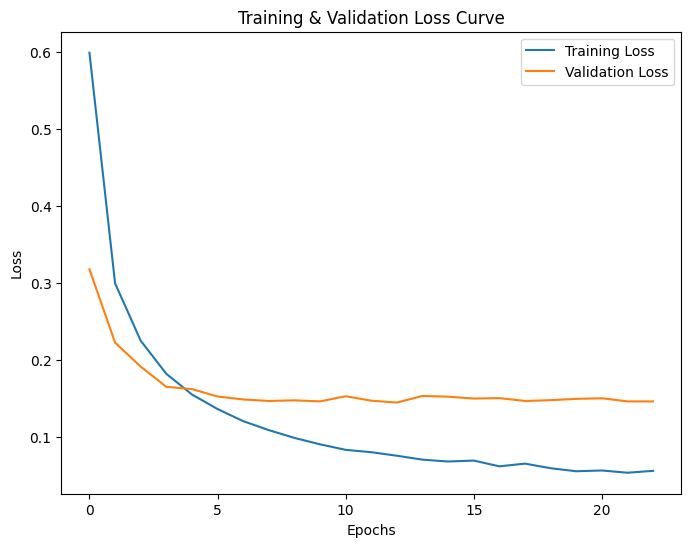

In [93]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(range(0, exp_4_epochs), train_losses, label='Training Loss')
plt.plot(range(0, exp_4_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Curve')
plt.legend()
plt.show()

## [11.2] Weight Decay = 5e-4

Model Setup

In [94]:
model_exp_4 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),  # Increased hidden size from 128 → 256
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 128),  # Added an extra hidden layer
    nn.ReLU(),
    nn.Linear(128, 10)  # Output layer
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_exp_4.parameters(), weight_decay=5e-4)  # L2 penalty 5e-4


Training and validation loop

In [95]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_exp_4.to(device)

# Lists to store loss and accuracy values
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Early stopping parameters
patience = 10  # Number of epochs to wait for improvement
best_val_loss = float('inf')  # Initialise with a very high loss
epochs_no_improve = 0  # Counter for epochs without improvement
best_model_path = 'best_model_exp_4.pth'  # Path to save the best model
exp_4_epochs = 0 # Number of total epochs

for epoch in range(epochs):
    model_exp_4.train()  # Set the model to training mode
    total_train_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training loop
    for data, target in dataloader_train:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model_exp_4(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

        # Compute training accuracy
        _, predicted = torch.max(output, 1)
        correct_train += (predicted == target).sum().item()
        total_train += target.size(0)

    avg_train_loss = total_train_loss / len(dataloader_train)
    train_accuracy = (correct_train / total_train) * 100

    # Compute validation loss and accuracy
    model_exp_4.eval()  # Set the model to evaluation mode
    total_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():  # Disable gradient computation for validation
        for data, target in dataloader_val:
            data, target = data.to(device), target.to(device)
            output = model_exp_4(data)
            loss = criterion(output, target)
            total_val_loss += loss.item()

            # Compute validation accuracy
            _, predicted = torch.max(output, 1)
            correct_val += (predicted == target).sum().item()
            total_val += target.size(0)

    avg_val_loss = total_val_loss / len(dataloader_val)
    val_accuracy = (correct_val / total_val) * 100

    # Store losses and accuracies for plotting
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print progress
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.6f}, Train Acc: {train_accuracy:.2f}%, Validation Loss: {avg_val_loss:.6f}, Validation Acc: {val_accuracy:.2f}%")

    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_without_improvement = 0
        # Save the model with the best validation loss
        torch.save(model_exp_4.state_dict(), 'best_model_exp_4.pth')
        exp_4_epochs = epoch+1
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Early stopping after {epoch+1} epochs due to no improvement in validation loss.")
            exp_4_epochs = epoch+1
            break


Epoch 1/200, Train Loss: 0.606323, Train Acc: 81.73%, Validation Loss: 0.319937, Validation Acc: 90.17%
Epoch 2/200, Train Loss: 0.305911, Train Acc: 90.72%, Validation Loss: 0.244973, Validation Acc: 92.35%
Epoch 3/200, Train Loss: 0.241717, Train Acc: 92.65%, Validation Loss: 0.208712, Validation Acc: 93.59%
Epoch 4/200, Train Loss: 0.198094, Train Acc: 94.00%, Validation Loss: 0.178021, Validation Acc: 94.69%
Epoch 5/200, Train Loss: 0.176845, Train Acc: 94.64%, Validation Loss: 0.170496, Validation Acc: 94.83%
Epoch 6/200, Train Loss: 0.159473, Train Acc: 95.12%, Validation Loss: 0.161901, Validation Acc: 94.96%
Epoch 7/200, Train Loss: 0.143795, Train Acc: 95.61%, Validation Loss: 0.152452, Validation Acc: 95.33%
Epoch 8/200, Train Loss: 0.140292, Train Acc: 95.64%, Validation Loss: 0.161061, Validation Acc: 94.97%
Epoch 9/200, Train Loss: 0.128704, Train Acc: 96.05%, Validation Loss: 0.147911, Validation Acc: 95.50%
Epoch 10/200, Train Loss: 0.124818, Train Acc: 96.17%, Validatio

Training and Validation loss curve for weight decay = 5e-4

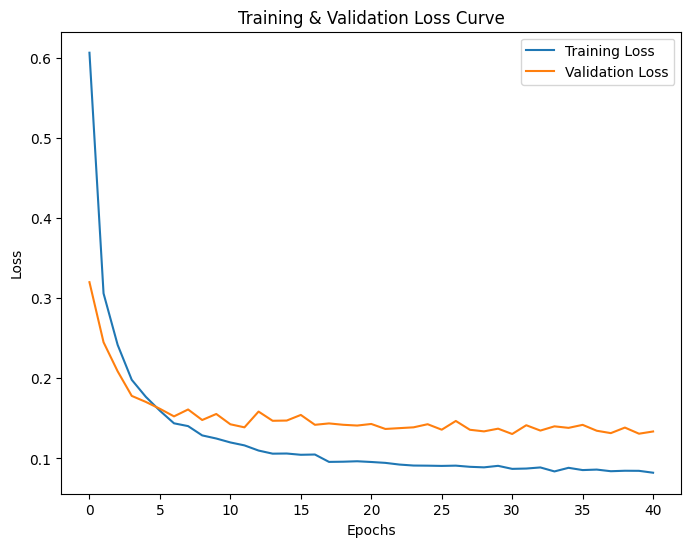

In [96]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(range(0, exp_4_epochs), train_losses, label='Training Loss')
plt.plot(range(0, exp_4_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Curve')
plt.legend()
plt.show()

## [11.3] Weight Decay = 1e-3

Model Setup

In [97]:
model_exp_4 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_exp_4.parameters(), weight_decay=1e-3)  # L2 penalty 1e-3


Training and validation loop

In [98]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_exp_4.to(device)

# Lists to store loss and accuracy values
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Early stopping parameters
patience = 10  # Number of epochs to wait for improvement
best_val_loss = float('inf')  # Initialise with a very high loss
epochs_no_improve = 0  # Counter for epochs without improvement
best_model_path = 'best_model_exp_4.pth'  # Path to save the best model
exp_4_epochs = 0 # Number of total epochs

for epoch in range(epochs):
    model_exp_4.train()  # Set the model to training mode
    total_train_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training loop
    for data, target in dataloader_train:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model_exp_4(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

        # Compute training accuracy
        _, predicted = torch.max(output, 1)
        correct_train += (predicted == target).sum().item()
        total_train += target.size(0)

    avg_train_loss = total_train_loss / len(dataloader_train)
    train_accuracy = (correct_train / total_train) * 100

    # Compute validation loss and accuracy
    model_exp_4.eval()  # Set the model to evaluation mode
    total_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():  # Disable gradient computation for validation
        for data, target in dataloader_val:
            data, target = data.to(device), target.to(device)
            output = model_exp_4(data)
            loss = criterion(output, target)
            total_val_loss += loss.item()

            # Compute validation accuracy
            _, predicted = torch.max(output, 1)
            correct_val += (predicted == target).sum().item()
            total_val += target.size(0)

    avg_val_loss = total_val_loss / len(dataloader_val)
    val_accuracy = (correct_val / total_val) * 100

    # Store losses and accuracies for plotting
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print progress
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.6f}, Train Acc: {train_accuracy:.2f}%, Validation Loss: {avg_val_loss:.6f}, Validation Acc: {val_accuracy:.2f}%")

    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_without_improvement = 0
        # Save the model with the best validation loss
        torch.save(model_exp_4.state_dict(), 'best_model_exp_4.pth')
        exp_4_epochs = epoch+1
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Early stopping after {epoch+1} epochs due to no improvement in validation loss.")
            exp_4_epochs = epoch+1
            break


Epoch 1/200, Train Loss: 0.617724, Train Acc: 81.33%, Validation Loss: 0.331185, Validation Acc: 90.15%
Epoch 2/200, Train Loss: 0.321479, Train Acc: 90.40%, Validation Loss: 0.251628, Validation Acc: 92.46%
Epoch 3/200, Train Loss: 0.254452, Train Acc: 92.41%, Validation Loss: 0.216630, Validation Acc: 93.51%
Epoch 4/200, Train Loss: 0.222101, Train Acc: 93.32%, Validation Loss: 0.198073, Validation Acc: 93.97%
Epoch 5/200, Train Loss: 0.197453, Train Acc: 94.10%, Validation Loss: 0.183329, Validation Acc: 94.49%
Epoch 6/200, Train Loss: 0.185323, Train Acc: 94.39%, Validation Loss: 0.175691, Validation Acc: 94.80%
Epoch 7/200, Train Loss: 0.171331, Train Acc: 94.75%, Validation Loss: 0.163708, Validation Acc: 95.06%
Epoch 8/200, Train Loss: 0.166009, Train Acc: 94.95%, Validation Loss: 0.168227, Validation Acc: 94.73%
Epoch 9/200, Train Loss: 0.161663, Train Acc: 95.06%, Validation Loss: 0.160666, Validation Acc: 95.26%
Epoch 10/200, Train Loss: 0.154829, Train Acc: 95.30%, Validatio

Training and Validation loss curve for weight decay = 1e-3

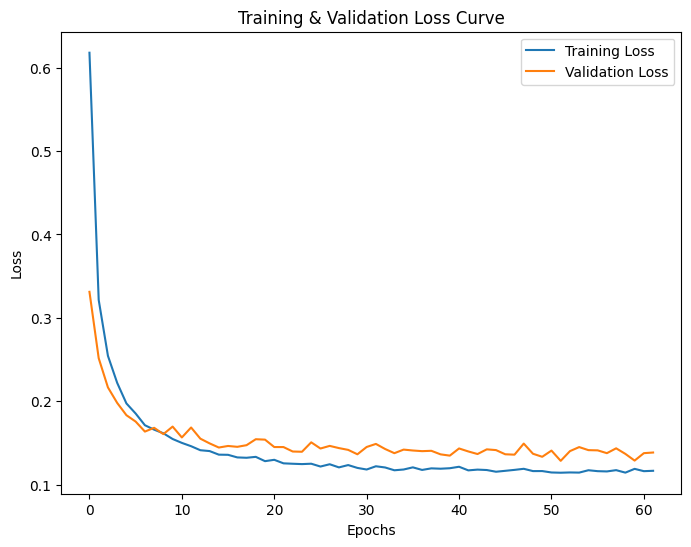

In [99]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(range(0, exp_4_epochs), train_losses, label='Training Loss')
plt.plot(range(0, exp_4_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Curve')
plt.legend()
plt.show()

**Conclusion:** With a weight decay of 5e-4, the model achieves the highest validation accuracy of 96.18% and demonstrates a balanced loss curve, indicating effective regularisation without overfitting. In contrast, 1e-4 leads to a larger gap between training and validation loss, suggesting insufficient regularisation, while 1e-3 causes underfitting due to a smaller gap and higher loss. Therefore, 5e-4 shows the best balance between regularisation and performance.

Since the loss curve is unstable with sharp fluctuations, the learning rate will be adjusted to smooth the curve and assess whether it leads to a more stable and optimised model

# 12. Experiment 5: Learning Rate


Different learning rates will be tested to identify the optimal value for stabilising the model and improving performance. The number of epochs will also be increased to 200 to allow for better convergence. Note: the learning rate of 1e-3 (default) is the previous figure in section 11.2.

## [12.1] Learning Rate = 1e-4

Model Setup

In [100]:
model_exp_5 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

criterion = nn.CrossEntropyLoss() # Cross Entropy Loss
optimizer = optim.Adam(model_exp_5.parameters(), lr=1e-4, weight_decay=5e-4) # Learning Rate = 1e-4

epochs = 200 # Increased epochs


Training and validation loop

In [101]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_exp_5.to(device)

# Lists to store loss and accuracy values
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Early stopping parameters
patience = 10  # Number of epochs to wait for improvement
best_val_loss = float('inf')  # Initialise with a very high loss
epochs_no_improve = 0  # Counter for epochs without improvement
best_model_path = 'best_model_exp_5.pth'  # Path to save the best model
exp_5_epochs = 0 # Number of total epochs

for epoch in range(epochs):
    model_exp_5.train()  # Set the model to training mode
    total_train_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training loop
    for data, target in dataloader_train:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model_exp_5(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

        # Compute training accuracy
        _, predicted = torch.max(output, 1)
        correct_train += (predicted == target).sum().item()
        total_train += target.size(0)

    avg_train_loss = total_train_loss / len(dataloader_train)
    train_accuracy = (correct_train / total_train) * 100

    # Compute validation loss and accuracy
    model_exp_5.eval()  # Set the model to evaluation mode
    total_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():  # Disable gradient computation for validation
        for data, target in dataloader_val:
            data, target = data.to(device), target.to(device)
            output = model_exp_5(data)
            loss = criterion(output, target)
            total_val_loss += loss.item()

            # Compute validation accuracy
            _, predicted = torch.max(output, 1)
            correct_val += (predicted == target).sum().item()
            total_val += target.size(0)

    avg_val_loss = total_val_loss / len(dataloader_val)
    val_accuracy = (correct_val / total_val) * 100

    # Store losses and accuracies for plotting
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print progress
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.6f}, Train Acc: {train_accuracy:.2f}%, Validation Loss: {avg_val_loss:.6f}, Validation Acc: {val_accuracy:.2f}%")

    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_without_improvement = 0
        # Save the model with the best validation loss
        torch.save(model_exp_5.state_dict(), 'best_model_exp_5.pth')
        exp_5_epochs = epoch+1
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Early stopping after {epoch+1} epochs due to no improvement in validation loss.")
            exp_5_epochs = epoch+1
            break


Epoch 1/200, Train Loss: 1.299770, Train Acc: 65.24%, Validation Loss: 0.731691, Validation Acc: 79.37%
Epoch 2/200, Train Loss: 0.668991, Train Acc: 80.33%, Validation Loss: 0.553658, Validation Acc: 83.78%
Epoch 3/200, Train Loss: 0.548552, Train Acc: 83.61%, Validation Loss: 0.471697, Validation Acc: 86.08%
Epoch 4/200, Train Loss: 0.478972, Train Acc: 85.51%, Validation Loss: 0.421071, Validation Acc: 87.30%
Epoch 5/200, Train Loss: 0.432198, Train Acc: 87.11%, Validation Loss: 0.384020, Validation Acc: 88.58%
Epoch 6/200, Train Loss: 0.393912, Train Acc: 88.18%, Validation Loss: 0.356063, Validation Acc: 89.39%
Epoch 7/200, Train Loss: 0.366610, Train Acc: 89.12%, Validation Loss: 0.334825, Validation Acc: 90.05%
Epoch 8/200, Train Loss: 0.341772, Train Acc: 89.78%, Validation Loss: 0.312450, Validation Acc: 90.76%
Epoch 9/200, Train Loss: 0.322262, Train Acc: 90.38%, Validation Loss: 0.296559, Validation Acc: 91.19%
Epoch 10/200, Train Loss: 0.304525, Train Acc: 90.95%, Validatio

Training and Validation loss curve for learning rate = 1e-4

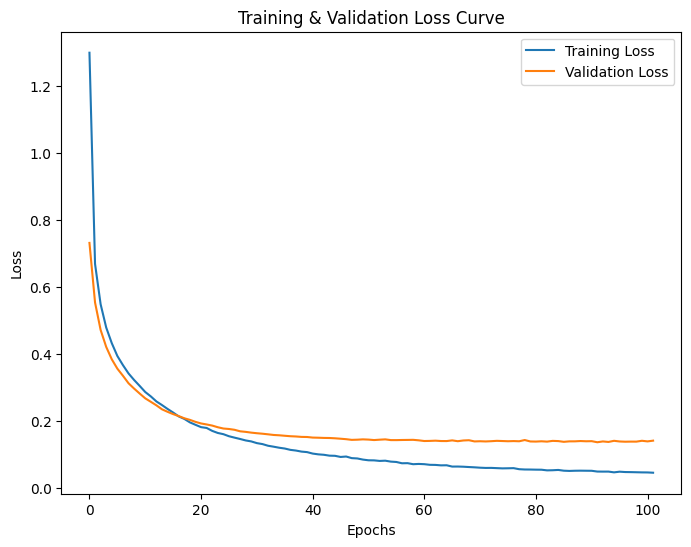

In [102]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(range(0, exp_5_epochs), train_losses, label='Training Loss')
plt.plot(range(0, exp_5_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Curve')
plt.legend()
plt.show()

Despite the curve being smoother, reducing the learning rate from the default (1e-3) to 1e-4 led to overfitting. Therefore, we will test a learning rate of 5e-4 to determine if it provides a better balance between training and validation performance.

## [12.2] Learning Rate = 5e-4

Model Setup

In [103]:
model_exp_5 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_exp_5.parameters(), lr=5e-4, weight_decay=5e-4) # Learning Rate = 5e-4

epochs = 200

Training and validation loop

In [104]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_exp_5.to(device)

# Lists to store loss and accuracy values
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Early stopping parameters
patience = 10  # Number of epochs to wait for improvement
best_val_loss = float('inf')  # Initialise with a very high loss
epochs_no_improve = 0  # Counter for epochs without improvement
best_model_path = 'best_model_exp_5.pth'  # Path to save the best model
exp_5_epochs = 0 # Number of total epochs

for epoch in range(epochs):
    model_exp_5.train()  # Set the model to training mode
    total_train_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training loop
    for data, target in dataloader_train:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model_exp_5(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

        # Compute training accuracy
        _, predicted = torch.max(output, 1)
        correct_train += (predicted == target).sum().item()
        total_train += target.size(0)

    avg_train_loss = total_train_loss / len(dataloader_train)
    train_accuracy = (correct_train / total_train) * 100

    # Compute validation loss and accuracy
    model_exp_5.eval()  # Set the model to evaluation mode
    total_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():  # Disable gradient computation for validation
        for data, target in dataloader_val:
            data, target = data.to(device), target.to(device)
            output = model_exp_5(data)
            loss = criterion(output, target)
            total_val_loss += loss.item()

            # Compute validation accuracy
            _, predicted = torch.max(output, 1)
            correct_val += (predicted == target).sum().item()
            total_val += target.size(0)

    avg_val_loss = total_val_loss / len(dataloader_val)
    val_accuracy = (correct_val / total_val) * 100

    # Store losses and accuracies for plotting
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print progress
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.6f}, Train Acc: {train_accuracy:.2f}%, Validation Loss: {avg_val_loss:.6f}, Validation Acc: {val_accuracy:.2f}%")

    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_without_improvement = 0
        # Save the model with the best validation loss
        torch.save(model_exp_5.state_dict(), 'best_model_exp_5.pth')
        exp_5_epochs = epoch+1
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Early stopping after {epoch+1} epochs due to no improvement in validation loss.")
            exp_5_epochs = epoch+1
            break


Epoch 1/200, Train Loss: 0.740484, Train Acc: 78.41%, Validation Loss: 0.414855, Validation Acc: 87.60%
Epoch 2/200, Train Loss: 0.382759, Train Acc: 88.45%, Validation Loss: 0.302999, Validation Acc: 90.84%
Epoch 3/200, Train Loss: 0.299173, Train Acc: 91.08%, Validation Loss: 0.253115, Validation Acc: 92.17%
Epoch 4/200, Train Loss: 0.248619, Train Acc: 92.70%, Validation Loss: 0.221349, Validation Acc: 93.27%
Epoch 5/200, Train Loss: 0.216845, Train Acc: 93.59%, Validation Loss: 0.198777, Validation Acc: 93.98%
Epoch 6/200, Train Loss: 0.190341, Train Acc: 94.29%, Validation Loss: 0.181040, Validation Acc: 94.46%
Epoch 7/200, Train Loss: 0.169837, Train Acc: 95.04%, Validation Loss: 0.174332, Validation Acc: 94.56%
Epoch 8/200, Train Loss: 0.154233, Train Acc: 95.45%, Validation Loss: 0.161650, Validation Acc: 95.13%
Epoch 9/200, Train Loss: 0.141698, Train Acc: 95.85%, Validation Loss: 0.157385, Validation Acc: 95.30%
Epoch 10/200, Train Loss: 0.132689, Train Acc: 95.93%, Validatio

Training and validation loss curve for learning rate = 5e-4

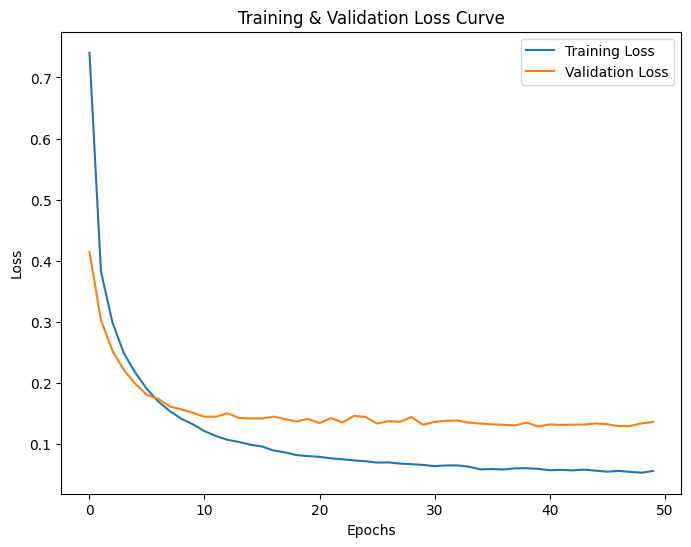

In [105]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(range(0, exp_5_epochs), train_losses, label='Training Loss')
plt.plot(range(0, exp_5_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Curve')
plt.legend()
plt.show()

Lowering the learning rate appears to be causing the model to overfit. To explore further, we will test a higher learning rate of 5e-3 to observe its effect on the model's performance.

## [12.3] Learning Rate = 5e-3

Model Setup

In [106]:
model_exp_5 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_exp_5.parameters(), lr=5e-3, weight_decay=5e-4) # Learning Rate = 5e-3

epochs = 200

Training and validation loop

In [107]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_exp_5.to(device)

# Lists to store loss and accuracy values
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Early stopping parameters
patience = 10  # Number of epochs to wait for improvement
best_val_loss = float('inf')  # Initialise with a very high loss
epochs_no_improve = 0  # Counter for epochs without improvement
best_model_path = 'best_model_exp_5.pth'  # Path to save the best model
exp_5_epochs = 0 # Number of total epochs

for epoch in range(epochs):
    model_exp_5.train()  # Set the model to training mode
    total_train_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training loop
    for data, target in dataloader_train:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model_exp_5(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

        # Compute training accuracy
        _, predicted = torch.max(output, 1)
        correct_train += (predicted == target).sum().item()
        total_train += target.size(0)

    avg_train_loss = total_train_loss / len(dataloader_train)
    train_accuracy = (correct_train / total_train) * 100

    # Compute validation loss and accuracy
    model_exp_5.eval()  # Set the model to evaluation mode
    total_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():  # Disable gradient computation for validation
        for data, target in dataloader_val:
            data, target = data.to(device), target.to(device)
            output = model_exp_5(data)
            loss = criterion(output, target)
            total_val_loss += loss.item()

            # Compute validation accuracy
            _, predicted = torch.max(output, 1)
            correct_val += (predicted == target).sum().item()
            total_val += target.size(0)

    avg_val_loss = total_val_loss / len(dataloader_val)
    val_accuracy = (correct_val / total_val) * 100

    # Store losses and accuracies for plotting
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print progress
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.6f}, Train Acc: {train_accuracy:.2f}%, Validation Loss: {avg_val_loss:.6f}, Validation Acc: {val_accuracy:.2f}%")

    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_without_improvement = 0
        # Save the model with the best validation loss
        torch.save(model_exp_5.state_dict(), 'best_model_exp_5.pth')
        exp_5_epochs = epoch+1
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Early stopping after {epoch+1} epochs due to no improvement in validation loss.")
            exp_5_epochs = epoch+1
            break


Epoch 1/200, Train Loss: 0.482673, Train Acc: 84.75%, Validation Loss: 0.278279, Validation Acc: 91.27%
Epoch 2/200, Train Loss: 0.314673, Train Acc: 90.09%, Validation Loss: 0.251438, Validation Acc: 92.11%
Epoch 3/200, Train Loss: 0.295307, Train Acc: 90.72%, Validation Loss: 0.211963, Validation Acc: 93.47%
Epoch 4/200, Train Loss: 0.285917, Train Acc: 91.21%, Validation Loss: 0.211599, Validation Acc: 93.36%
Epoch 5/200, Train Loss: 0.275631, Train Acc: 91.32%, Validation Loss: 0.237280, Validation Acc: 92.61%
Epoch 6/200, Train Loss: 0.273972, Train Acc: 91.32%, Validation Loss: 0.210967, Validation Acc: 93.59%
Epoch 7/200, Train Loss: 0.271702, Train Acc: 91.46%, Validation Loss: 0.221483, Validation Acc: 93.10%
Epoch 8/200, Train Loss: 0.263600, Train Acc: 91.70%, Validation Loss: 0.205930, Validation Acc: 93.58%
Epoch 9/200, Train Loss: 0.265059, Train Acc: 91.61%, Validation Loss: 0.207070, Validation Acc: 93.43%
Epoch 10/200, Train Loss: 0.268718, Train Acc: 91.54%, Validatio

Training and Validation loss curve for learning rate = 5e-3

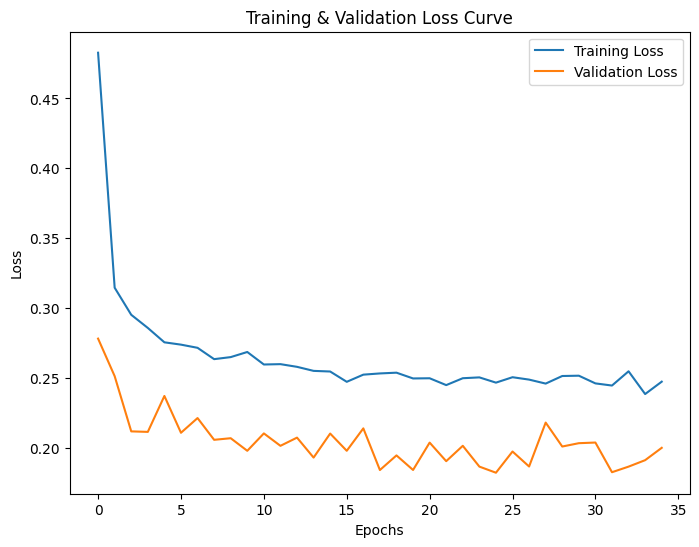

In [108]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(range(0, exp_5_epochs), train_losses, label='Training Loss')
plt.plot(range(0, exp_5_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Curve')
plt.legend()
plt.show()

**Conclusion:** Decreasing the learning rate led to a smoother loss curve but caused the model to overfit. Increasing the learning rate resulted in a highly unstable loss curve with relatively higher loss values. Therefore, the default learning rate of 1e-3 (section 11.2) appears to be the most optimal choice.

# 13. Experiment 6: Batch Size

To further optimise the model for better performance, different batch sizes will be tested. Currently, the batch size was set to 128. Here, different batch sizes of 32, 64 and 256 will be explored.

## [13.1] Batch_size = 32

Model Setup

In [109]:
model_exp_6 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_exp_6.parameters(), lr=1e-3, weight_decay=5e-4)

# Batch size and epochs
batch_size = 32 # batch size = 32
epochs = 200

# Create Dataloaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
dataloader_train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dataloader_val = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

Training and validation loop

In [110]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_exp_6.to(device)

# Lists to store loss and accuracy values
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Early stopping parameters
patience = 10  # Number of epochs to wait for improvement
best_val_loss = float('inf')  # Initialise with a very high loss
epochs_no_improve = 0  # Counter for epochs without improvement
best_model_path = 'best_model_exp_6.pth'  # Path to save the best model
exp_6_epochs = 0 # Number of total epochs

for epoch in range(epochs):
    model_exp_6.train()  # Set the model to training mode
    total_train_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training loop
    for data, target in dataloader_train:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model_exp_6(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

        # Compute training accuracy
        _, predicted = torch.max(output, 1)
        correct_train += (predicted == target).sum().item()
        total_train += target.size(0)

    avg_train_loss = total_train_loss / len(dataloader_train)
    train_accuracy = (correct_train / total_train) * 100

    # Compute validation loss and accuracy
    model_exp_6.eval()  # Set the model to evaluation mode
    total_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():  # Disable gradient computation for validation
        for data, target in dataloader_val:
            data, target = data.to(device), target.to(device)
            output = model_exp_6(data)
            loss = criterion(output, target)
            total_val_loss += loss.item()

            # Compute validation accuracy
            _, predicted = torch.max(output, 1)
            correct_val += (predicted == target).sum().item()
            total_val += target.size(0)

    avg_val_loss = total_val_loss / len(dataloader_val)
    val_accuracy = (correct_val / total_val) * 100

    # Store losses and accuracies for plotting
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print progress
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.6f}, Train Acc: {train_accuracy:.2f}%, Validation Loss: {avg_val_loss:.6f}, Validation Acc: {val_accuracy:.2f}%")

    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_without_improvement = 0
        # Save the model with the best validation loss
        torch.save(model_exp_6.state_dict(), 'best_model_exp_6.pth')
        exp_6_epochs = epoch+1
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Early stopping after {epoch+1} epochs due to no improvement in validation loss.")
            exp_6_epochs = epoch+1
            break


Epoch 1/200, Train Loss: 0.489889, Train Acc: 84.85%, Validation Loss: 0.270094, Validation Acc: 91.96%
Epoch 2/200, Train Loss: 0.272655, Train Acc: 91.55%, Validation Loss: 0.213392, Validation Acc: 93.68%
Epoch 3/200, Train Loss: 0.223041, Train Acc: 93.11%, Validation Loss: 0.178722, Validation Acc: 94.39%
Epoch 4/200, Train Loss: 0.205267, Train Acc: 93.62%, Validation Loss: 0.173219, Validation Acc: 94.77%
Epoch 5/200, Train Loss: 0.188008, Train Acc: 94.15%, Validation Loss: 0.159115, Validation Acc: 95.22%
Epoch 6/200, Train Loss: 0.175193, Train Acc: 94.52%, Validation Loss: 0.172935, Validation Acc: 94.89%
Epoch 7/200, Train Loss: 0.164199, Train Acc: 94.77%, Validation Loss: 0.159879, Validation Acc: 95.06%
Epoch 8/200, Train Loss: 0.163081, Train Acc: 94.76%, Validation Loss: 0.158841, Validation Acc: 95.15%
Epoch 9/200, Train Loss: 0.158755, Train Acc: 95.04%, Validation Loss: 0.141894, Validation Acc: 95.79%
Epoch 10/200, Train Loss: 0.153888, Train Acc: 95.19%, Validatio

Training and Validation loss curve for batch size = 32

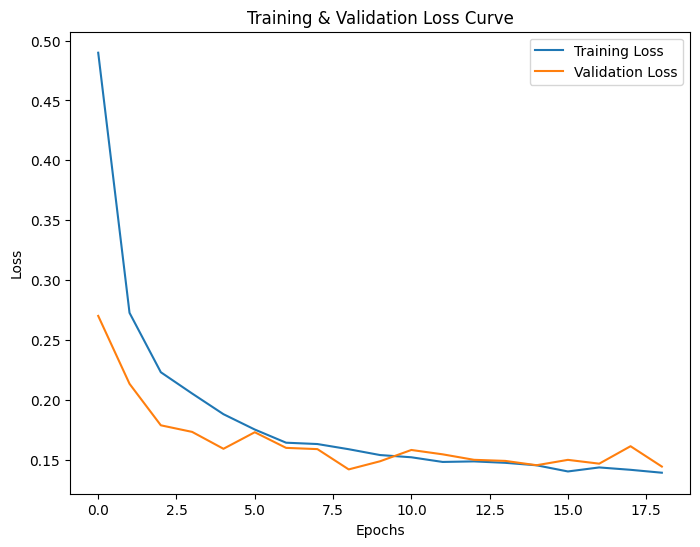

In [111]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(range(0, exp_6_epochs), train_losses, label='Training Loss')
plt.plot(range(0, exp_6_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Curve')
plt.legend()
plt.show()

## [13.2] Batch_size = 64

Model Setup

In [125]:
model_exp_6 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_exp_6.parameters(), lr=1e-3, weight_decay=5e-4)

# Batch size and epochs
batch_size = 64 # batch size = 64
epochs = 200

# Create Dataloaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
dataloader_train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dataloader_val = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

Training and validation loop

In [126]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_exp_6.to(device)

# Lists to store loss and accuracy values
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Early stopping parameters
patience = 10  # Number of epochs to wait for improvement
best_val_loss = float('inf')  # Initialise with a very high loss
epochs_no_improve = 0  # Counter for epochs without improvement
best_model_path = 'best_model_exp_6.pth'  # Path to save the best model
exp_6_epochs = 0 # Number of total epochs

for epoch in range(epochs):
    model_exp_6.train()  # Set the model to training mode
    total_train_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training loop
    for data, target in dataloader_train:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model_exp_6(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

        # Compute training accuracy
        _, predicted = torch.max(output, 1)
        correct_train += (predicted == target).sum().item()
        total_train += target.size(0)

    avg_train_loss = total_train_loss / len(dataloader_train)
    train_accuracy = (correct_train / total_train) * 100

    # Compute validation loss and accuracy
    model_exp_6.eval()  # Set the model to evaluation mode
    total_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():  # Disable gradient computation for validation
        for data, target in dataloader_val:
            data, target = data.to(device), target.to(device)
            output = model_exp_6(data)
            loss = criterion(output, target)
            total_val_loss += loss.item()

            # Compute validation accuracy
            _, predicted = torch.max(output, 1)
            correct_val += (predicted == target).sum().item()
            total_val += target.size(0)

    avg_val_loss = total_val_loss / len(dataloader_val)
    val_accuracy = (correct_val / total_val) * 100

    # Store losses and accuracies for plotting
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print progress
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.6f}, Train Acc: {train_accuracy:.2f}%, Validation Loss: {avg_val_loss:.6f}, Validation Acc: {val_accuracy:.2f}%")

    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_without_improvement = 0
        # Save the model with the best validation loss
        torch.save(model_exp_6.state_dict(), 'best_model_exp_6.pth')
        exp_6_epochs = epoch+1
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Early stopping after {epoch+1} epochs due to no improvement in validation loss.")
            exp_6_epochs = epoch+1
            break


Epoch 1/200, Train Loss: 0.530757, Train Acc: 83.74%, Validation Loss: 0.291339, Validation Acc: 91.12%
Epoch 2/200, Train Loss: 0.277986, Train Acc: 91.57%, Validation Loss: 0.217569, Validation Acc: 93.50%
Epoch 3/200, Train Loss: 0.224625, Train Acc: 93.18%, Validation Loss: 0.194424, Validation Acc: 94.23%
Epoch 4/200, Train Loss: 0.193211, Train Acc: 94.02%, Validation Loss: 0.174375, Validation Acc: 94.69%
Epoch 5/200, Train Loss: 0.173478, Train Acc: 94.60%, Validation Loss: 0.172348, Validation Acc: 94.68%
Epoch 6/200, Train Loss: 0.166153, Train Acc: 94.80%, Validation Loss: 0.158454, Validation Acc: 95.30%
Epoch 7/200, Train Loss: 0.152525, Train Acc: 95.21%, Validation Loss: 0.155796, Validation Acc: 95.17%
Epoch 8/200, Train Loss: 0.144922, Train Acc: 95.45%, Validation Loss: 0.154393, Validation Acc: 95.12%
Epoch 9/200, Train Loss: 0.138681, Train Acc: 95.61%, Validation Loss: 0.150233, Validation Acc: 95.32%
Epoch 10/200, Train Loss: 0.135196, Train Acc: 95.71%, Validatio

Training and Validation loss curve for batch size = 64

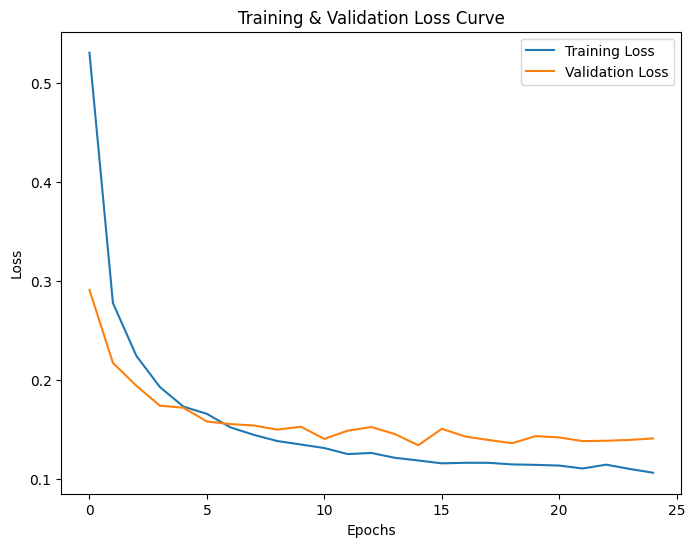

In [127]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(range(0, exp_6_epochs), train_losses, label='Training Loss')
plt.plot(range(0, exp_6_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Curve')
plt.legend()
plt.show()

## [13.3] Batch_size = 256

Model Setup

In [115]:
model_exp_6 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_exp_6.parameters(), lr=1e-3, weight_decay=5e-4)

# Batch size and epochs
batch_size = 256 # batch size = 256
epochs = 200

# Create Dataloaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
dataloader_train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dataloader_val = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

Training and validation loop

In [116]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_exp_6.to(device)

# Lists to store loss and accuracy values
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Early stopping parameters
patience = 10  # Number of epochs to wait for improvement
best_val_loss = float('inf')  # Initialise with a very high loss
epochs_no_improve = 0  # Counter for epochs without improvement
best_model_path = 'best_model_exp_6.pth'  # Path to save the best model
exp_6_epochs = 0 # Number of total epochs

for epoch in range(epochs):
    model_exp_6.train()  # Set the model to training mode
    total_train_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training loop
    for data, target in dataloader_train:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model_exp_6(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

        # Compute training accuracy
        _, predicted = torch.max(output, 1)
        correct_train += (predicted == target).sum().item()
        total_train += target.size(0)

    avg_train_loss = total_train_loss / len(dataloader_train)
    train_accuracy = (correct_train / total_train) * 100

    # Compute validation loss and accuracy
    model_exp_6.eval()  # Set the model to evaluation mode
    total_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():  # Disable gradient computation for validation
        for data, target in dataloader_val:
            data, target = data.to(device), target.to(device)
            output = model_exp_6(data)
            loss = criterion(output, target)
            total_val_loss += loss.item()

            # Compute validation accuracy
            _, predicted = torch.max(output, 1)
            correct_val += (predicted == target).sum().item()
            total_val += target.size(0)

    avg_val_loss = total_val_loss / len(dataloader_val)
    val_accuracy = (correct_val / total_val) * 100

    # Store losses and accuracies for plotting
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print progress
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.6f}, Train Acc: {train_accuracy:.2f}%, Validation Loss: {avg_val_loss:.6f}, Validation Acc: {val_accuracy:.2f}%")

    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_without_improvement = 0
        # Save the model with the best validation loss
        torch.save(model_exp_6.state_dict(), 'best_model_exp_6.pth')
        exp_6_epochs = epoch+1
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Early stopping after {epoch+1} epochs due to no improvement in validation loss.")
            exp_6_epochs = epoch+1
            break


Epoch 1/200, Train Loss: 0.731313, Train Acc: 78.14%, Validation Loss: 0.386143, Validation Acc: 88.62%
Epoch 2/200, Train Loss: 0.359592, Train Acc: 89.14%, Validation Loss: 0.275172, Validation Acc: 91.54%
Epoch 3/200, Train Loss: 0.272493, Train Acc: 91.90%, Validation Loss: 0.221273, Validation Acc: 93.40%
Epoch 4/200, Train Loss: 0.220992, Train Acc: 93.35%, Validation Loss: 0.192759, Validation Acc: 94.21%
Epoch 5/200, Train Loss: 0.192876, Train Acc: 94.25%, Validation Loss: 0.178537, Validation Acc: 94.70%
Epoch 6/200, Train Loss: 0.170067, Train Acc: 95.03%, Validation Loss: 0.172064, Validation Acc: 94.77%
Epoch 7/200, Train Loss: 0.153685, Train Acc: 95.38%, Validation Loss: 0.163121, Validation Acc: 95.04%
Epoch 8/200, Train Loss: 0.141044, Train Acc: 95.75%, Validation Loss: 0.160258, Validation Acc: 95.22%
Epoch 9/200, Train Loss: 0.134797, Train Acc: 95.98%, Validation Loss: 0.158140, Validation Acc: 95.09%
Epoch 10/200, Train Loss: 0.123305, Train Acc: 96.19%, Validatio

Training and Validation loss curve for batch size = 256

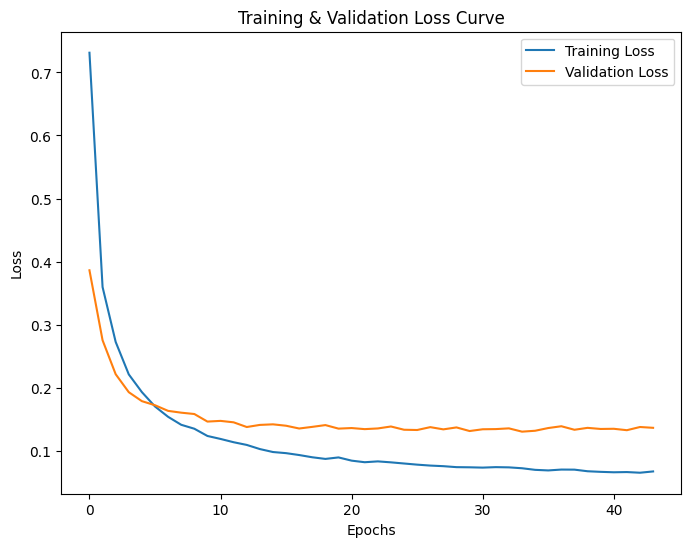

In [117]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(range(0, exp_6_epochs), train_losses, label='Training Loss')
plt.plot(range(0, exp_6_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Curve')
plt.legend()
plt.show()

**Conclusion:**
Lower batch sizes (e.g., 32) typically led to more stable performance with minimal overfitting but struggled to achieve higher training and validation accuracies. In contrast, higher batch sizes, such as 256, achieved the highest validation accuracies but showed signs of overfitting, as indicated by the larger gap between training and validation accuracy.

Therefore, the initial setting of a batch size of 128 (section 11.2) is the best choice, as it shows a balance between stability and generalisation, maintaining a strong validation accuracy while minimising overfitting.

# 14. Final Model

The final model is more complex than the initial one, incorporating regularisation techniques to reduce overfitting, such as dropout, early stopping, weight decay, and an optimised learning rate as well as batch size for better performance.

## [14.1] Final Model Setup

In [132]:
model_final = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_final.parameters(), lr=1e-3, weight_decay=5e-4) # Optimal settings for each tested

# Batch size and epochs
batch_size = 128
epochs = 200

# Create Dataloaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
dataloader_train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
dataloader_val = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

## [14.2] Training and Validation Loop

In [133]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_final.to(device)

# Lists to store loss and accuracy values
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Early stopping parameters
patience = 10  # Number of epochs to wait for improvement
best_val_loss = float('inf')  # Initialise with a very high loss
epochs_no_improve = 0  # Counter for epochs without improvement
best_model_path = 'best_model_final.pth'  # Path to save the best model
final_epochs = 0 # Number of total epochs

for epoch in range(epochs):
    model_final.train()  # Set the model to training mode
    total_train_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training loop
    for data, target in dataloader_train:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model_final(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

        # Compute training accuracy
        _, predicted = torch.max(output, 1)
        correct_train += (predicted == target).sum().item()
        total_train += target.size(0)

    avg_train_loss = total_train_loss / len(dataloader_train)
    train_accuracy = (correct_train / total_train) * 100

    # Compute validation loss and accuracy
    model_final.eval()  # Set the model to evaluation mode
    total_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():  # Disable gradient computation for validation
        for data, target in dataloader_val:
            data, target = data.to(device), target.to(device)
            output = model_final(data)
            loss = criterion(output, target)
            total_val_loss += loss.item()

            # Compute validation accuracy
            _, predicted = torch.max(output, 1)
            correct_val += (predicted == target).sum().item()
            total_val += target.size(0)

    avg_val_loss = total_val_loss / len(dataloader_val)
    val_accuracy = (correct_val / total_val) * 100

    # Store losses and accuracies for plotting
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    # Print progress
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.6f}, Train Acc: {train_accuracy:.2f}%, Validation Loss: {avg_val_loss:.6f}, Validation Acc: {val_accuracy:.2f}%")

    # Early stopping check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_without_improvement = 0
        # Save the model with the best validation loss
        torch.save(model_final.state_dict(), 'best_model_final.pth')
        final_epochs = epoch+1
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Early stopping after {epoch+1} epochs due to no improvement in validation loss.")
            final_epochs = epoch+1
            break


Epoch 1/200, Train Loss: 0.616111, Train Acc: 81.35%, Validation Loss: 0.345059, Validation Acc: 89.28%
Epoch 2/200, Train Loss: 0.311496, Train Acc: 90.51%, Validation Loss: 0.243043, Validation Acc: 92.67%
Epoch 3/200, Train Loss: 0.240934, Train Acc: 92.60%, Validation Loss: 0.191517, Validation Acc: 94.28%
Epoch 4/200, Train Loss: 0.200754, Train Acc: 93.87%, Validation Loss: 0.173433, Validation Acc: 94.74%
Epoch 5/200, Train Loss: 0.175551, Train Acc: 94.67%, Validation Loss: 0.165044, Validation Acc: 94.94%
Epoch 6/200, Train Loss: 0.155558, Train Acc: 95.21%, Validation Loss: 0.160943, Validation Acc: 95.16%
Epoch 7/200, Train Loss: 0.146996, Train Acc: 95.52%, Validation Loss: 0.163363, Validation Acc: 94.95%
Epoch 8/200, Train Loss: 0.139056, Train Acc: 95.64%, Validation Loss: 0.141963, Validation Acc: 95.67%
Epoch 9/200, Train Loss: 0.127587, Train Acc: 96.01%, Validation Loss: 0.142942, Validation Acc: 95.51%
Epoch 10/200, Train Loss: 0.121003, Train Acc: 96.17%, Validatio

## [13.3] Training and Validation Loss Curve of the Final Model

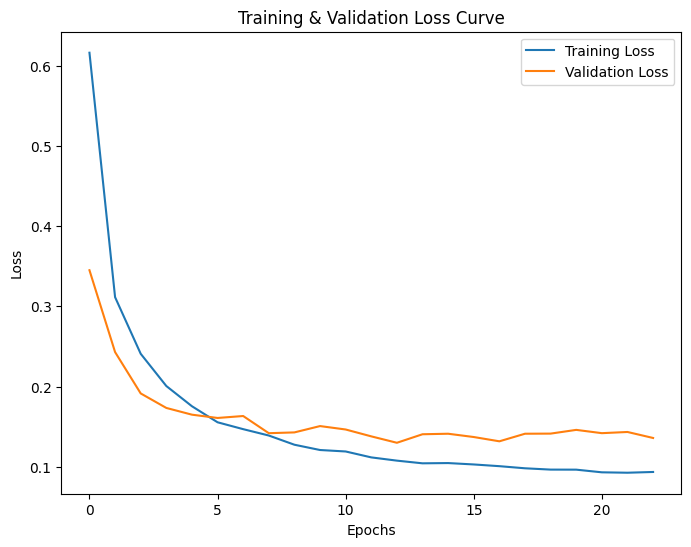

In [134]:
# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(range(0, final_epochs), train_losses, label='Training Loss')
plt.plot(range(0, final_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Curve')
plt.legend()
plt.show()

## [13.4] Final Model Evaluation

### Testing Set

In [135]:
# Load the saved model weights
model_final.load_state_dict(torch.load('best_model_final.pth'))

# Set the model to evaluation mode
model_final.eval()

# Initialize variables to accumulate test loss and accuracy
total_test_loss = 0.0
correct_test = 0
total_test = 0

# Lists to store the true and predicted labels for the confusion matrix
true_labels = []
predicted_labels = []

# Disable gradient calculation during testing
with torch.no_grad():
    for data, target in dataloader_test:
        data, target = data.to(device), target.to(device)
        output = model_final(data)
        loss = criterion(output, target)

        total_test_loss += loss.item()  # Accumulate test loss

        # Get the predictions
        _, predicted = torch.max(output, 1)
        correct_test += (predicted == target).sum().item()  # Count correct predictions
        total_test += target.size(0)  # Count total examples in the batch

        # Append true and predicted labels for confusion matrix
        true_labels.extend(target.cpu().numpy())  # Move to CPU and convert to numpy
        predicted_labels.extend(predicted.cpu().numpy())

# Compute average test loss and accuracy
avg_test_loss = total_test_loss / len(dataloader_test)
test_accuracy = (correct_test / total_test) * 100  # Calculate accuracy as a percentage

# Print the final test results
print(f"Final Test Loss: {avg_test_loss:.6f}, Final Test Accuracy: {test_accuracy:.2f}%")


Final Test Loss: 0.352366, Final Test Accuracy: 90.18%


The final model achieved a test accuracy of 90.18%, indicating strong predictive performance. However, the relatively high final test loss of 0.35 suggests some degree of miscalibration or uncertainty in the model's confidence for certain predictions

### Confusion Matrix

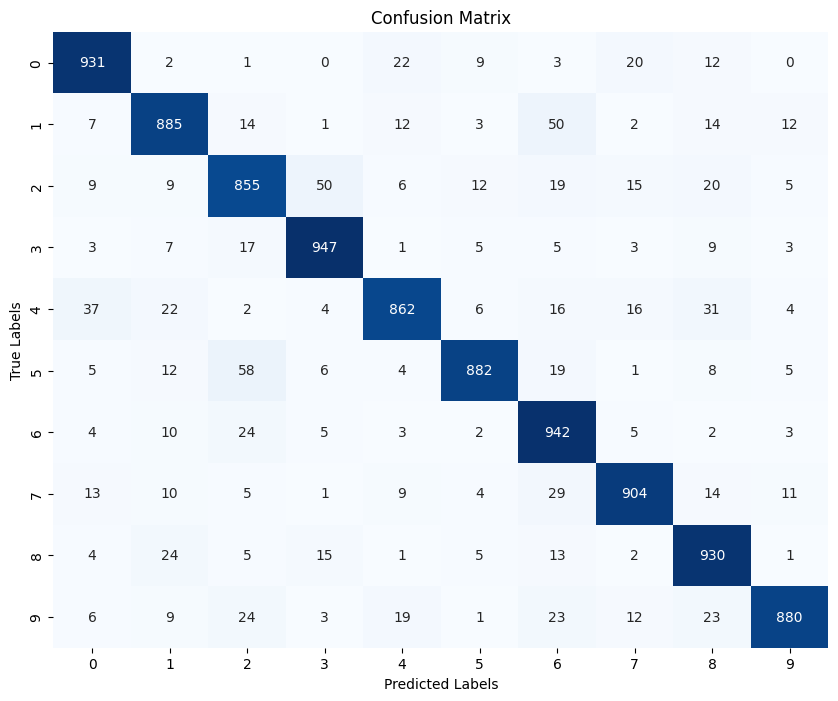

In [136]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Accuracies Per Label

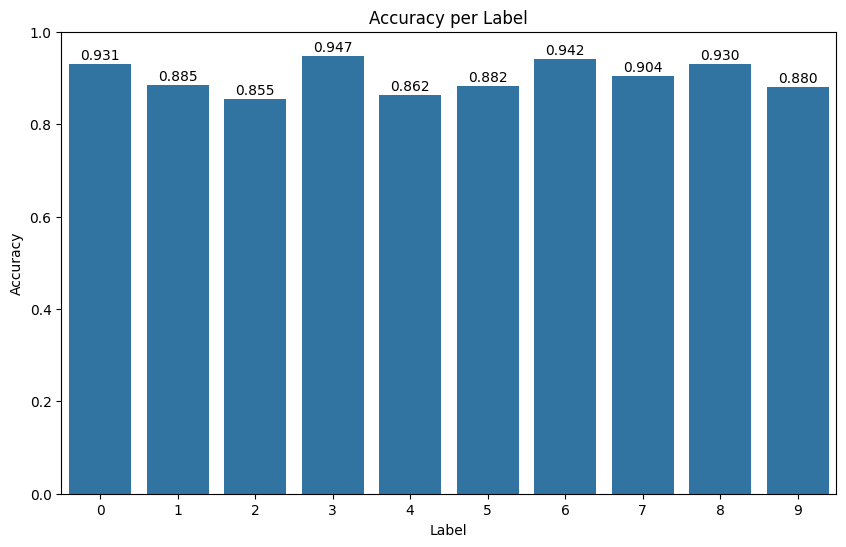

In [137]:
# Calculate accuracy for each label
label_accuracies = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(len(label_accuracies)), y=label_accuracies)
plt.xlabel("Label")
plt.ylabel("Accuracy")
plt.title("Accuracy per Label")
plt.xticks(np.arange(len(label_accuracies)))  # Set x-axis ticks to label indices

# Display values on top of bars
for i, acc in enumerate(label_accuracies):
    plt.text(i, acc + 0.01, f"{acc:.3f}", ha="center", fontsize=10)

plt.ylim(0, 1)
plt.show()

The model performed best on label 6, achieving an accuracy of 94.7%, while label 2 had the lowest accuracy at 85.5%.